Digit Recognizer
This is a good start for solving fundamental multiple classification and computer vision questions. The image dataset is from MNIST.
Neural Network, Random Forest, and KNN are applied to predict the digits in the test data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#df_train = pd.read_csv(r'D:\ML\Kaggle projects\Digit Recognizer\train.csv')
df_train = pd.read_csv(r'./Data/train.csv')
df_test = pd.read_csv(r'./Data/test.csv')
train_size = df_train.shape[0]

print(df_train.shape)
print(df_test.shape)
print(train_size)

(42000, 785)
(28000, 784)
42000


In [3]:
X_train = df_train.iloc[:,1:]
print(X_train.shape)
y_train = df_train.iloc[:,0]
print(y_train.shape)

(42000, 784)
(42000,)


Commonly used functions

In [4]:
def concat_dataset(train, test):
    #return pd.concat([train, test], sort = True).reset_index(drop = True)
    return pd.concat([train, test]).reset_index(drop = True)
    
def split_dataset(data, train_length):
    return data.iloc[:train_length], data.iloc[train_length:]

In [5]:
df_all = concat_dataset(X_train, df_test)
print(df_all.shape)
print(X_train.shape)
print(df_test.shape)

(70000, 784)
(42000, 784)
(28000, 784)


Draw the original digits images. Taking one sample with digit 8 as an example.

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   7  24  24  97 253 253
  253 253 255 180  48   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  30 186 252 252 253 252 252
  252 252 253 252 227  29   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  38 155 252 252 252 25

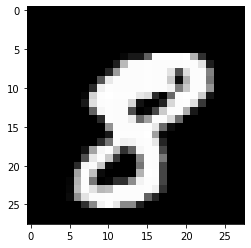

In [6]:
im = X_train.iloc[10,:].values.reshape(28,28)
print(im)
plt.imshow(im, cmap='gray')
plt.show()

In [7]:
# Set all feature values as 1 when they are > 0
df_all[df_all > 0] = 1
print(train_size)
X_train, X_test = split_dataset(df_all, train_size)
print(X_train.shape)
print(df_test.shape)
print(X_test.shape)

42000
(42000, 784)
(28000, 784)
(28000, 784)


[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 

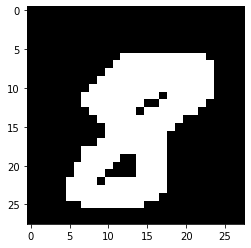

(42000, 784)
(42000,)


In [8]:
im = X_train.iloc[10,:].values.reshape(28,28)
print(im)
plt.imshow(im, cmap='gray')
plt.show()
print(X_train.shape)
print(y_train.shape)

Split training set as 70% training models, 30% test set before predicting the dat in test.csv.

In [9]:
from sklearn.model_selection import train_test_split
X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(X_train, y_train, test_size = 0.3, random_state = 42)

Apply KNN first as KNN is simple and only require minimum turning to get the initial result for analysis.

In [10]:
from sklearn.neighbors import KNeighborsClassifier
for k in range(3,5):
    clf = KNeighborsClassifier(n_neighbors=k)
    knn = clf.fit(X_train_t, y_train_t)
    score = knn.score(X_train_t, y_train_t)
    print('KNN score on training set from train.csv is ', score, ',k =', k)
    score = knn.score(X_test_t, y_test_t)
    print('KNN score on test set from train.csv is ', score, '.k =', k)    

KNN score on training set from train.csv is  0.9782312925170068 ,k = 3
KNN score on test set from train.csv is  0.9615873015873015 .k = 3
KNN score on training set from train.csv is  0.9745578231292517 ,k = 4
KNN score on test set from train.csv is  0.9614285714285714 .k = 4


Apply Random Forest.

In [11]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 80)
rf = clf.fit(X_train_t, y_train_t)
score = rf.score(X_train_t, y_train_t)
print('Random Forest score on training set from train.csv is ', score)
score = rf.score(X_test_t, y_test_t)
print('Random Forest score on test set from train.csv is ', score)

Random Forest score on training set from train.csv is  1.0
Random Forest score on test set from train.csv is  0.9631746031746031


Apply Neural Network.

In [12]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='adam', alpha=0.2,max_iter=500,learning_rate='invscaling',
                    hidden_layer_sizes=(100,), random_state = 1)
nn = clf.fit(X_train_t, y_train_t)
score = nn.score(X_train_t, y_train_t)
print('Neural Network score on training set from train.csv is ', score)
score = nn.score(X_test_t, y_test_t)
print('Neural Network score on test set from train.csv is ', score)

Neural Network score on training set from train.csv is  0.9937414965986394
Neural Network score on test set from train.csv is  0.9691269841269842


Apply trained Neural Network model to predict the result on test.csv. # The prediction result was submitted to Kaggle. Score is 0.96514.

In [13]:
print(X_test.shape)
pred = nn.predict(X_test)
print(pred)
print(pred.shape)
np.savetxt(r'D:\ML\Kaggle projects\Digit Recognizer\pred_data.csv', pred)

(28000, 784)
[2 0 9 ... 3 9 2]
(28000,)
